In [13]:
import pandas as pd
import numpy as np
import scipy as stats

In [72]:
data = pd.read_csv('titanic.csv')
data.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [65]:
#data['Survived'] = str(data['Survived'])
#data['Pclass'] = str(data['Pclass'])

In [73]:
data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [15]:
data['Sex'].describe()

count      887
unique       2
top       male
freq       573
Name: Sex, dtype: object

In [116]:
#sumarize biaya berdasarkan sex
data.groupby(['Sex'])['Fare'].agg(['mean', 'sum', 'count', 'max', 'min'])

,mean,sum,count,max,min
Sex,,,,,
female,44.479818,13966.6628,314,512.3292,6.75
male,25.633935,14688.2449,573,512.3292,0.00


In [225]:
#cari rasio dari penumpang selamat
group = data.groupby(['Sex', 'Survived'])['Pclass'].agg(['count'])
# group['count']['male']
group
group.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

count
Sex    Survived           
female 0         25.796178
       1         74.203822
male   0         80.977312
       1         19.022688

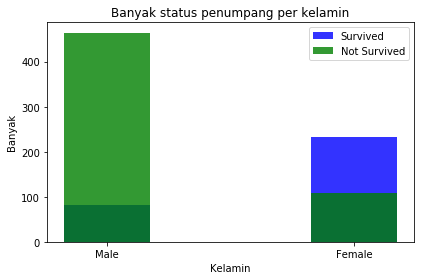

In [231]:
import matplotlib.pyplot as plt

# create plot
fig, ax = plt.subplots()
index = np.arange(2)
bar_width = 0.35
opacity = 0.8

female = plt.bar(index, group['count']['female'], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Survived')
 
male = plt.bar(index, group['count']['male'], bar_width,
                 alpha=opacity,
                 color='g',
                 label='Not Survived')

plt.xlabel('Kelamin')
plt.ylabel('Banyak')
plt.title('Banyak status penumpang per kelamin')
plt.xticks(index, ('Male', 'Female'))
plt.legend()
 
plt.tight_layout()
plt.show()

# pd.crosstab(group['Sex'], group['Survived'], normalize='index').plot.bar(rot=0, stacked=True)